In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('2.linear_regression_models/AB_NYC_2019.csv',
            nrows=10000)

In [3]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


<h3>Deal with data that has many categories<h3>

In [7]:
df.neighbourhood.value_counts()[:7]

Williamsburg          944
Bedford-Stuyvesant    742
Harlem                614
Upper West Side       520
East Village          489
Upper East Side       405
Bushwick              387
Name: neighbourhood, dtype: int64

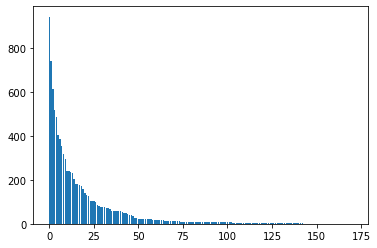

In [12]:
count = df.neighbourhood.value_counts().values

plt.bar(np.arange(len(count)), count)
plt.show()

# we have some popular at the left

In [15]:
for c in ['neighbourhood', 'neighbourhood_group', 'room_type']:
    df[c] = df[c].fillna('NA').str.lower().str.replace(' ', '_')

In [16]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365


In [17]:
categories = 'neighbourhood_group=' + df.neighbourhood_group +\
    ' ' + 'neighbourhood=' + df.neighbourhood + ' ' + \
    'room_type=' + df.room_type

In [18]:
categories

0       neighbourhood_group=brooklyn neighbourhood=ken...
1       neighbourhood_group=manhattan neighbourhood=mi...
2       neighbourhood_group=manhattan neighbourhood=ha...
3       neighbourhood_group=brooklyn neighbourhood=cli...
4       neighbourhood_group=manhattan neighbourhood=ea...
                              ...                        
9995    neighbourhood_group=brooklyn neighbourhood=bus...
9996    neighbourhood_group=brooklyn neighbourhood=cob...
9997    neighbourhood_group=manhattan neighbourhood=ea...
9998    neighbourhood_group=brooklyn neighbourhood=car...
9999    neighbourhood_group=queens neighbourhood=jamai...
Length: 10000, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
cv_categories = CountVectorizer(token_pattern='\S+',
                            min_df=200, dtype='int32')

# S - everything that is not whitespace
# s - tabs, spaces, blanks etc

# That's why we united words in cols with _

# change from int64 to int32 as it saves memory

<h3> We need to tweak params, otherwise
        CountVectorizer() will split not in right way </h3>

In [75]:
cv_categories.fit(categories)

CountVectorizer(dtype='int32', min_df=200, token_pattern='\\S+')

In [76]:
cv_categories.get_feature_names()[:10]

['neighbourhood=bedford-stuyvesant',
 'neighbourhood=bushwick',
 'neighbourhood=chelsea',
 'neighbourhood=crown_heights',
 'neighbourhood=east_harlem',
 'neighbourhood=east_village',
 'neighbourhood=greenpoint',
 'neighbourhood=harlem',
 "neighbourhood=hell's_kitchen",
 'neighbourhood=lower_east_side']

In [77]:
len(cv_categories.get_feature_names())

20

In [78]:
string_example = 'neighbourhood_group=brooklyn neighbourhood=fordham room_type=private_room'

In [79]:
X = cv_categories.transform([string_example])

In [80]:
X.toarray()[0]
# we're interested in first row

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int32)

In [81]:
list(zip(cv_categories.get_feature_names(), X.toarray()[0]))

# as we can see, None of the 'neighbourhood'
# matches ours

[('neighbourhood=bedford-stuyvesant', 0),
 ('neighbourhood=bushwick', 0),
 ('neighbourhood=chelsea', 0),
 ('neighbourhood=crown_heights', 0),
 ('neighbourhood=east_harlem', 0),
 ('neighbourhood=east_village', 0),
 ('neighbourhood=greenpoint', 0),
 ('neighbourhood=harlem', 0),
 ("neighbourhood=hell's_kitchen", 0),
 ('neighbourhood=lower_east_side', 0),
 ('neighbourhood=upper_east_side', 0),
 ('neighbourhood=upper_west_side', 0),
 ('neighbourhood=washington_heights', 0),
 ('neighbourhood=west_village', 0),
 ('neighbourhood=williamsburg', 0),
 ('neighbourhood_group=brooklyn', 1),
 ('neighbourhood_group=manhattan', 0),
 ('neighbourhood_group=queens', 0),
 ('room_type=entire_home/apt', 0),
 ('room_type=private_room', 1)]

<h3> How to merge DV/CV with text </h3>

In [86]:
cv_name = CountVectorizer(min_df=50,
                    dtype='int32')
cv_name.fit(df.name.fillna(''))

CountVectorizer(dtype='int32', min_df=50)

In [87]:
len(cv_name.get_feature_names())

160

In [88]:
cv_name.get_feature_names()[:10]

['15',
 '1bd',
 '1br',
 '2br',
 '3br',
 'amazing',
 'and',
 'apartment',
 'apt',
 'area']

In [89]:
X_categories = cv_categories.transform(categories)
X_name = cv_name.transform(df.name.fillna(''))

In [90]:
X_categories

<10000x20 sparse matrix of type '<class 'numpy.int32'>'
	with 25910 stored elements in Compressed Sparse Row format>

In [91]:
X_name

<10000x160 sparse matrix of type '<class 'numpy.int32'>'
	with 40489 stored elements in Compressed Sparse Row format>

<h4> How can we merge 2 matricies together?</h4>

In [92]:
import scipy

In [96]:
X = scipy.sparse.hstack([X_categories, X_name])

In [98]:
X = X.tocsr()

<h3>How to deal with imbalanced datasets</h3>

In [100]:
df['is_expensive'] = (df.price >= 1000)

In [101]:
df.is_expensive.mean()

0.0081

In [103]:
from sklearn.model_selection import train_test_split

In [122]:
df_train, df_test = train_test_split(df, test_size=0.25,
                            random_state=1, stratify=df.is_expensive)

In [123]:
df_train.is_expensive.mean()

0.008133333333333333

In [124]:
df_test.is_expensive.mean()

0.008